# Measuring objects

In [1]:
# Imports
import cv2
import imutils
import numpy as np
from imutils import contours
from imutils import perspective
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt

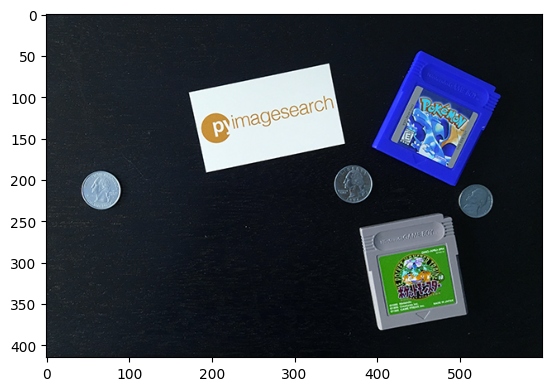

In [2]:
# Load the image
image = cv2.imread('../../data/measuring_image.png')

# Convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image)
plt.show()

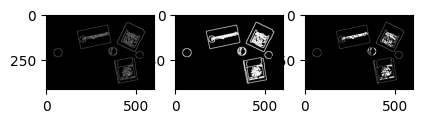

In [3]:
# Blur slightly
gray_gb = cv2.GaussianBlur(gray, (7, 7), 0)
    
# Perform edge detection
edged = cv2.Canny(gray_gb, 50, 100)
    
# Perform a dilation + erosion to close gaps in between object edges
edged_d = cv2.dilate(edged, None, iterations=1)
edged_e = cv2.erode(edged_d, None, iterations=1)

# Plot images
plt.subplot(1, 4, 1)
plt.imshow(edged, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(edged_d, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(edged_e, cmap='gray')
plt.show()

In [4]:
# Find contours in the edge map
cnts = cv2.findContours(edged_e.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort the contours from left-to-right
(cnts, _) = contours.sort_contours(cnts)

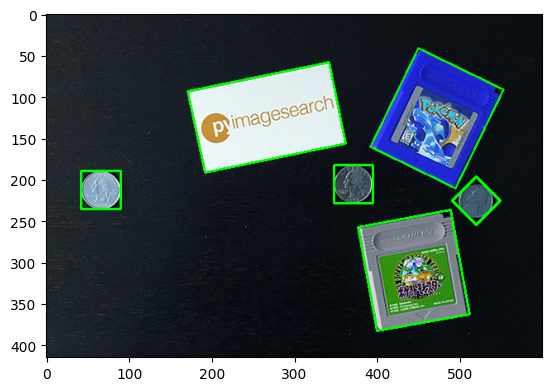

In [5]:
# Loop over the contours individually
boxes = []
for c in cnts:
    
    # If the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
        continue
    
    # Compute the rotated bounding box of the contour
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    
    # Order the points in the contour such that they appear in top-left, top-right, bottom-right, and bottom-left
    box = perspective.order_points(box)
    boxes.append(box)
        
    # Draw the outline of the rotated bounding box
    cv2.drawContours(image, [box.astype("int")], -1, (0, 255, 0), 2)

# Show image
plt.imshow(image)
plt.show()

In [6]:
# Takes the mean of two points
def midpoint(ptA, ptB):
    return (ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5

In [7]:
# To convert pixels to metric measures, we need the pixels to metric value. This can be obtaind using camera and lens parameters.
pixelsPerMetric = 2

In [8]:
# Iterate over boxes
for box in boxes:

    # Unpack the box points
    (tl, tr, br, bl) = box
        
    # Compute the midpoint between the top-left and top-right coordinates
    (tltrX, tltrY) = midpoint(tl, tr)

    # Compute the midpoint between bottom-left and bottom-right coordinates
    (blbrX, blbrY) = midpoint(bl, br)
    
    # Compute the midpoint between the top-left and bottom-left points,
    (tlblX, tlblY) = midpoint(tl, bl)

    # Compute the midpoint between the top-righ and bottom-right
    (trbrX, trbrY) = midpoint(tr, br)
    
    # Draw the midpoints on the image
    cv2.circle(image, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(image, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(image, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(image, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    
    # Draw lines between the midpoints
    cv2.line(image, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 2)
    cv2.line(image, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 255), 2)
    
    # Compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    
    # Compute the size of the object using the known pixels per metric
    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric
    print("\nDimensions = " + str((dimA, dimB)))


Dimensions = (23.0, 24.0)

Dimensions = (50.06058829059043, 87.02765365100912)

Dimensions = (23.0, 23.5)

Dimensions = (63.79508209885775, 56.930330229149384)

Dimensions = (66.19101147436864, 57.24727067729954)

Dimensions = (20.506096654409877, 20.506096654409877)


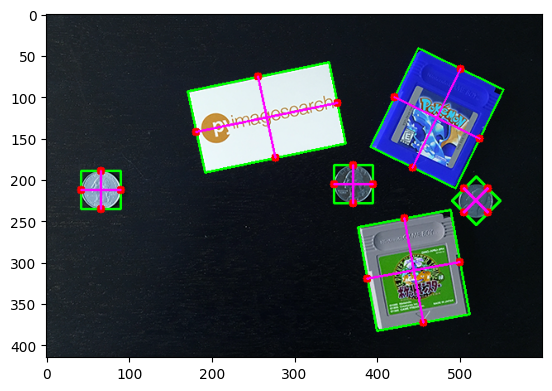

In [9]:
# Show image
plt.imshow(image)
plt.show()